In [4]:
## Observations and Insights 


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, how= "left", on ="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
unique_mice = merge_df["Mouse ID"].unique()
total_mice = len(unique_mice)
total_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates= merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicate_mice=duplicates.unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse= merge_df.loc[merge_df["Mouse ID"]=="g989", :]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
clean_df= merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice =clean_df["Mouse ID"].unique()
len(clean_mice)


248

## Summary Statistics

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_table =pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = clean_df["Drug Regimen"].value_counts()
timepoint_df
    

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

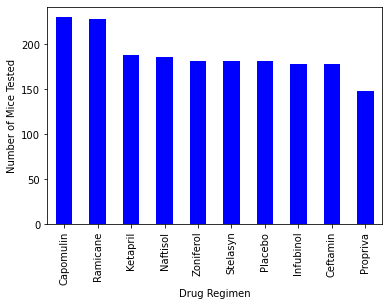

In [14]:
timepoint_df.plot.bar(color='blue') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

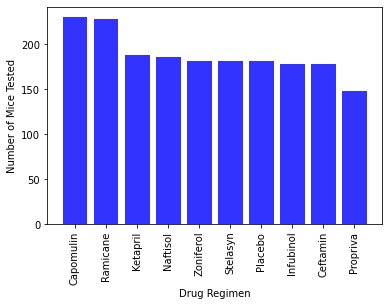

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = timepoint_df.index.values
y_axis = timepoint_df.values
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis,color='blue', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

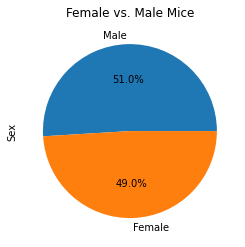

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()



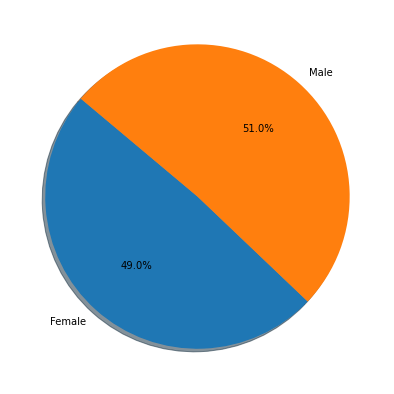

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
data = [49, 51]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

timepoint = clean_df.groupby("Mouse ID")
last_timepoint = timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, clean_df)
tumor_volume_df.head()




,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,n364,31.095335,1,Ramicane,Male,4,17
1,45,b128,38.982878,2,Capomulin,Female,9,22
2,45,l661,59.851956,3,Ceftamin,Male,18,26
3,45,y865,64.729837,3,Ceftamin,Male,23,26
4,45,y769,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
39991,20,x401,36.065835,0,Capomulin,Female,16,15
39992,20,m269,61.145866,0,Stelasyn,Female,22,28
39993,20,a963,51.463734,0,Stelasyn,Female,23,27
39994,20,p189,56.530204,3,Ketapril,Male,8,28


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
medicine = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in medicine:
    volume = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor.append(volume)
    #print(tumor)

# Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
    
# Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")
    

The outliers for Capomulin are 86       23.343598
216      23.343598
346      23.343598
476      23.343598
606      23.343598
           ...    
16336    23.343598
16466    23.343598
16596    23.343598
16726    23.343598
16856    23.343598
Name: Tumor Volume (mm3), Length: 130, dtype: float64.


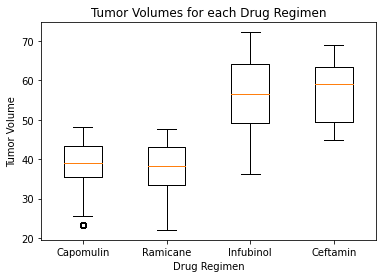

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor, labels = medicine)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_volume_time= clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

tumor_volume_time.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


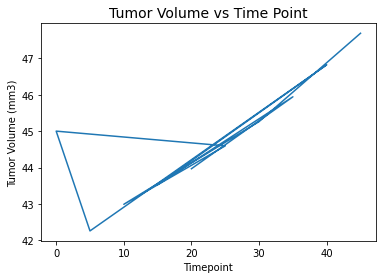

In [36]:
#Chose the mouse i557
Tumor_volume_cap= tumor_volume_df.loc[tumor_volume_df["Mouse ID"] == "i557"]

plt.plot(Tumor_volume_cap['Timepoint'], Tumor_volume_cap['Tumor Volume (mm3)'])

plt.title("Tumor Volume vs Time Point", fontsize = 14)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

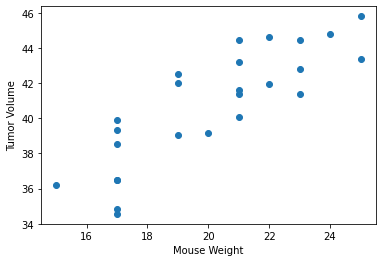

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin= clean_df.loc[merge_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
capomulin_df= capomulin["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin["Weight (g)"].unique()
plt.scatter(mouse_weight, capomulin_df)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
tumor_volume_time.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


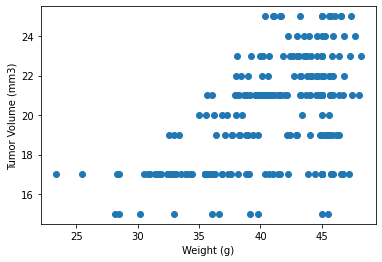

In [47]:


plt.scatter(tumor_volume_time.iloc[:,2],tumor_volume_time.iloc[:,7])

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [51]:
#compute the Pearson correlation coefficient between "Weight (g)" and "Tumor Volume (mm3)"
mouseweight=tumor_volume_time.iloc[:,2]
tumorvolume=tumor_volume_time.iloc[:,7]

correlation = st.pearsonr(mouseweight,tumorvolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


In [ ]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
